In [1]:
from pyspark.sql import SparkSession
Spark = (SparkSession.builder.appName("capstone_ML")\
        .config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083")\
        .enableHiveSupport().getOrCreate())

## a. Read the data form Hive Tables

In [25]:
dept = Spark.sql("select * from capstone_hadoop_rk.departments")
titles = Spark.sql("select * from capstone_hadoop_rk.titles")
salaries = Spark.sql("select * from capstone_hadoop_rk.salaries")
dept_mrg = Spark.sql("select * from capstone_hadoop_rk.department_managers")
dept_emp = Spark.sql("select * from capstone_hadoop_rk.department_employees")
emp = Spark.sql("select * from capstone_hadoop_rk.employees_final")

## b. Joining all the tables at employee level

In [228]:
df =  emp.join(dept_emp,on="emp_no",how="left")\
         .join(salaries,on="emp_no",how="left")\
         .join(titles,emp.emp_title_id==titles.title_id)\
         .join(dept,on="dept_no",how="left")

In [229]:
df.toPandas()

,dept_no,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,last_performance_ratings,left_,_c10,salary,title_id,title,dept_name
0,d005,10001,e0003,1953-09-02,Georgi,Facello,M,1986-06-26,9,C,1,None,60117,e0003,Senior Engineer,"""development"""
1,d007,10002,s0001,1964-06-02,Bezalel,Simmel,F,1985-11-21,8,B,0,None,65828,s0001,Staff,"""Sales"""
2,d004,10003,e0003,1959-12-03,Parto,Bamford,M,1986-08-28,1,C,0,None,40006,e0003,Senior Engineer,"""Production"""
3,d004,10004,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01,5,A,0,None,40054,e0003,Senior Engineer,"""Production"""
4,d003,10005,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,6,A,0,None,78228,s0001,Staff,"""Human Resources"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331598,d004,499995,e0002,1958-09-24,Dekang,Lichtner,F,1993-01-12,5,B,0,None,40000,e0002,Engineer,"""Production"""
331599,d004,499996,e0003,1953-03-07,Zito,Baaz,M,1990-09-27,8,B,1,None,58058,e0003,Senior Engineer,"""Production"""
331600,d005,499997,e0003,1961-08-03,Berhard,Lenart,M,1986-04-21,10,B,0,None,49597,e0003,Senior Engineer,"""development"""
331601,d002,499998,s0001,1956-09-05,Patricia,Breugel,M,1993-10-13,1,B,0,None,40000,s0001,Staff,"""Finance"""


## Loading the Data into HDFS in parquet file

In [333]:
df.write.format('parquet').save('Capstone_Complete_Data')

## Exploring the Data

In [230]:
df.cache()

DataFrame[dept_no: string, emp_no: int, emp_title_id: string, birth_date: date, first_name: string, last_name: string, sex: string, hire_date: date, no_of_projects: int, last_performance_ratings: string, left_: int, _c10: date, salary: bigint, title_id: string, title: string, dept_name: string]

In [231]:
df.show(5)

+-------+------+------------+----------+----------+---------+---+----------+--------------+------------------------+-----+----+------+--------+---------------+-----------------+
|dept_no|emp_no|emp_title_id|birth_date|first_name|last_name|sex| hire_date|no_of_projects|last_performance_ratings|left_|_c10|salary|title_id|          title|        dept_name|
+-------+------+------------+----------+----------+---------+---+----------+--------------+------------------------+-----+----+------+--------+---------------+-----------------+
|   d005| 10001|       e0003|1953-09-02|    Georgi|  Facello|  M|1986-06-26|             9|                       C|    1|null| 60117|   e0003|Senior Engineer|    "development"|
|   d007| 10002|       s0001|1964-06-02|   Bezalel|   Simmel|  F|1985-11-21|             8|                       B|    0|null| 65828|   s0001|          Staff|          "Sales"|
|   d004| 10003|       e0003|1959-12-03|     Parto|  Bamford|  M|1986-08-28|             1|                   

In [232]:
df.toPandas().head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
dept_no,d005,d007,d004,d004,d003,d005,d008,d005,d006,d006
emp_no,10001,10002,10003,10004,10005,10006,10007,10008,10009,10010
emp_title_id,e0003,s0001,e0003,e0003,s0001,e0003,s0001,e0001,e0003,e0002
birth_date,1953-09-02,1964-06-02,1959-12-03,1954-05-01,1955-01-21,1953-04-20,1957-05-23,1958-02-19,1952-04-19,1963-06-01
first_name,Georgi,Bezalel,Parto,Chirstian,Kyoichi,Anneke,Tzvetan,Saniya,Sumant,Duangkaew
last_name,Facello,Simmel,Bamford,Koblick,Maliniak,Preusig,Zielinski,Kalloufi,Peac,Piveteau
sex,M,F,M,M,M,F,F,M,F,F
hire_date,1986-06-26,1985-11-21,1986-08-28,1986-12-01,1989-09-12,1989-06-02,1989-02-10,1994-09-15,1985-02-18,1989-08-24
no_of_projects,9,8,1,5,6,10,6,9,8,4
last_performance_ratings,C,B,C,A,A,B,B,C,B,A


In [233]:
df.count()

331603

In [234]:
df.columns

['dept_no',
 'emp_no',
 'emp_title_id',
 'birth_date',
 'first_name',
 'last_name',
 'sex',
 'hire_date',
 'no_of_projects',
 'last_performance_ratings',
 'left_',
 '_c10',
 'salary',
 'title_id',
 'title',
 'dept_name']

In [235]:
df.printSchema()

root
 |-- dept_no: string (nullable = true)
 |-- emp_no: integer (nullable = true)
 |-- emp_title_id: string (nullable = true)
 |-- birth_date: date (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- hire_date: date (nullable = true)
 |-- no_of_projects: integer (nullable = true)
 |-- last_performance_ratings: string (nullable = true)
 |-- left_: integer (nullable = true)
 |-- _c10: date (nullable = true)
 |-- salary: long (nullable = true)
 |-- title_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- dept_name: string (nullable = true)



In [236]:
df.groupBy('left_').count().show()

+-----+------+
|left_| count|
+-----+------+
|    1| 33021|
|    0|298582|
+-----+------+



In [246]:
Sal = salaries.toPandas()

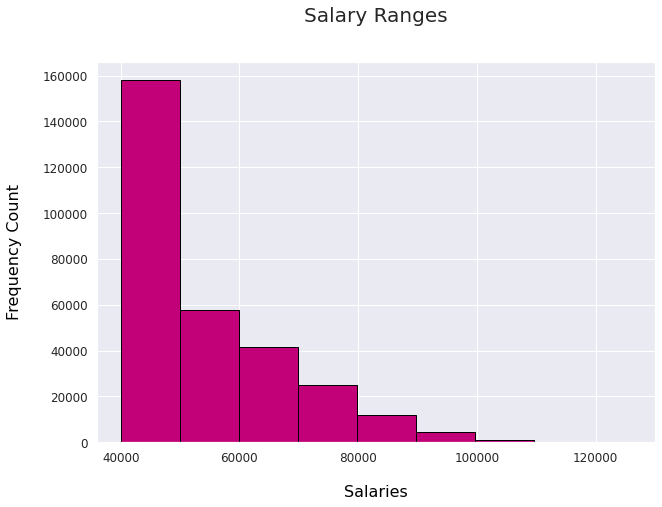

In [247]:
plt.rcParams['figure.figsize']=(10,7)
plt.hist(Sal['salary'],bins=9,color='xkcd:magenta',alpha=1,edgecolor='black')
plt.title('Salary Ranges',fontsize=20,pad=40)
plt.xlabel('Salaries',fontsize=16,color='black',labelpad=20)
plt.ylabel('Frequency Count',fontsize=16,color='black',labelpad=20)
plt.xlim(36000,130000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Show plot
plt.show()

In [248]:
Avg_Salary = Spark.sql("""
SELECT
    t.title,
    avg(s.salary) as Avg_Salary
FROM capstone_hadoop_rk.employees e
JOIN capstone_hadoop_rk.titles t
ON t.title_id = e.emp_title_id
JOIN capstone_hadoop_rk.salaries s
ON s.emp_no = e.emp_no
GROUP BY t.title
""")

In [249]:
Avg_Salary = Avg_Salary.toPandas()

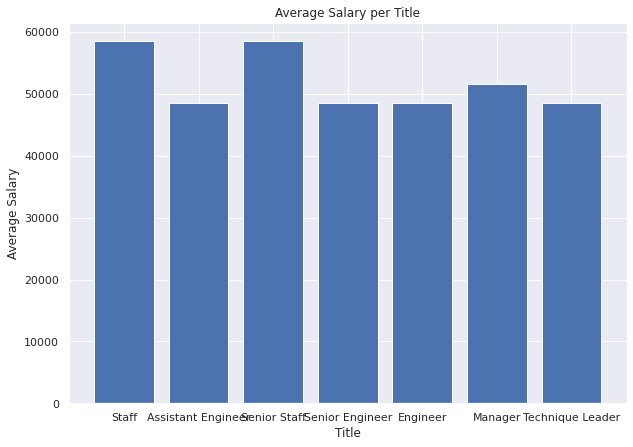

In [250]:
plt.rcParams['figure.figsize']=(10,7)

plt.bar(Avg_Salary['title'], Avg_Salary['Avg_Salary'])
plt.xlabel("Title")
plt.ylabel("Average Salary")
plt.title("Average Salary per Title")
plt.show()

In [257]:
Left = Spark.sql("""
SELECT
    left1,
    count(left1) as Employee_left
FROM capstone_hadoop_rk.employees
GROUP BY left1
""")

In [258]:
Left.show()

+-----+-------------+
|left1|Employee_left|
+-----+-------------+
| true|        29867|
|false|       270157|
+-----+-------------+



In [259]:
Left.toPandas()

,left1,Employee_left
0,True,29867
1,False,270157


In [264]:
Left.withColumn('left1', Left['left1'])

['left1', 'Employee_left']

# Model Building

In [237]:
#Keep a copy of the original dataframe for later use
df1 = df

In [238]:
#Columns that will be used as features and their types
continuous_features = ['no_of_projects','salary']

categorical_features = ['last_performance_ratings', 'dept_name', 'left_',
                      'title']

In [202]:
#Encoding all categorical features
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, PolynomialExpansion, VectorIndexer

In [203]:
def create_category_vars( dataset, field_name ):
    idx_col = field_name + "Index"
    col_vec = field_name + "Vec"

    stringIndexer = StringIndexer( inputCol=field_name, outputCol=idx_col )

    model = stringIndexer.fit( dataset )
    indexed = model.transform( dataset )

    encoder = OneHotEncoder( dropLast=True,inputCol=idx_col,outputCol= col_vec )

    return encoder.transform( indexed )

In [239]:
for col in categorical_features:
    df1 = create_category_vars(df1, col)
    df1.cache()

In [205]:
df1.columns

['dept_no',
 'emp_no',
 'emp_title_id',
 'birth_date',
 'first_name',
 'last_name',
 'sex',
 'hire_date',
 'no_of_projects',
 'last_performance_ratings',
 'left_',
 '_c10',
 'salary',
 'title_id',
 'title',
 'dept_name',
 'last_performance_ratingsIndex',
 'last_performance_ratingsVec',
 'dept_nameIndex',
 'dept_nameVec',
 'left_Index',
 'left_Vec',
 'titleIndex',
 'titleVec']

In [206]:
df1.show(5)

+-------+------+------------+----------+----------+---------+---+----------+--------------+------------------------+-----+----+------+--------+---------------+-----------------+-----------------------------+---------------------------+--------------+-------------+----------+-------------+----------+-------------+
|dept_no|emp_no|emp_title_id|birth_date|first_name|last_name|sex| hire_date|no_of_projects|last_performance_ratings|left_|_c10|salary|title_id|          title|        dept_name|last_performance_ratingsIndex|last_performance_ratingsVec|dept_nameIndex| dept_nameVec|left_Index|     left_Vec|titleIndex|     titleVec|
+-------+------+------------+----------+----------+---------+---+----------+--------------+------------------------+-----+----+------+--------+---------------+-----------------+-----------------------------+---------------------------+--------------+-------------+----------+-------------+----------+-------------+
|   d005| 10001|       e0003|1953-09-02|    Georgi|  Fa

In [207]:
categorical_vecs = [ "".join( (cat, "Vec") ) for cat in categorical_features ]

In [208]:
categorical_vecs

['last_performance_ratingsVec', 'dept_nameVec', 'left_Vec', 'titleVec']

In [209]:
#Including all features for model building

all_features= continuous_features + categorical_vecs

In [210]:
all_features

['no_of_projects',
 'salary',
 'last_performance_ratingsVec',
 'dept_nameVec',
 'left_Vec',
 'titleVec']

In [211]:
# Creating the vector of all predictors
assembler = VectorAssembler( inputCols = all_features, outputCol = "features")

In [212]:
df1.columns

['dept_no',
 'emp_no',
 'emp_title_id',
 'birth_date',
 'first_name',
 'last_name',
 'sex',
 'hire_date',
 'no_of_projects',
 'last_performance_ratings',
 'left_',
 '_c10',
 'salary',
 'title_id',
 'title',
 'dept_name',
 'last_performance_ratingsIndex',
 'last_performance_ratingsVec',
 'dept_nameIndex',
 'dept_nameVec',
 'left_Index',
 'left_Vec',
 'titleIndex',
 'titleVec']

In [213]:
df1 = assembler.transform(df1)

In [214]:
# Setting the target variables - left
df1 = df1.withColumn( "label", df1.left_.cast( 'double' ) )

In [215]:
df1.select( "features", "label" ).show( 5 )

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(21,[0,1,4,6,16],...|    1|
|(21,[0,1,2,8,14,1...|    0|
|(21,[0,1,4,7,14,1...|    0|
|(21,[0,1,3,7,14,1...|    0|
|(21,[0,1,3,13,14,...|    0|
+--------------------+-----+
only showing top 5 rows



In [216]:
#Split the dataset
train_df, test_df = df1.randomSplit( [0.7, 0.3], seed = 42 )

In [217]:
#Train Linear Regression Model
from pyspark.ml.regression import LinearRegression

In [218]:
linreg = LinearRegression(maxIter=500, regParam=0.0)
lm = linreg.fit( train_df )

In [219]:
# Intercept and coefficients
lm.intercept

0.999999999996648

In [220]:
lm.coefficients

DenseVector([-0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [221]:
#Making predictions on test data
y_pred  =  lm.transform( test_df )
y_pred.select( 'features', 'label', 'prediction' ).show( 5 )

+--------------------+-----+--------------------+
|            features|label|          prediction|
+--------------------+-----+--------------------+
|(21,[0,1,3,11,14,...|    0|2.55351295663786E-15|
|(21,[0,1,3,11,14,...|    0|5.551115123125783...|
|(21,[0,1,3,11,14,...|    0|-3.33066907387546...|
|(21,[0,1,4,11,14,...|    0|-7.77156117237609...|
|(21,[0,1,3,11,14,...|    0|1.554312234475219...|
+--------------------+-----+--------------------+
only showing top 5 rows



In [222]:
# Metrics to check the accuracy of model (goodness of fit)
#Calculating RMSE and R-Squared
from pyspark.ml.evaluation import RegressionEvaluator

In [223]:
rmse_evaluator = RegressionEvaluator(labelCol="label",
                            predictionCol="prediction",
                            metricName="rmse" )

In [224]:
lm_rmse = rmse_evaluator.evaluate( y_pred )
lm_rmse

3.6823181095949104e-14

In [225]:
r2_evaluator = RegressionEvaluator(labelCol="label",
                            predictionCol="prediction",
                            metricName="r2" )
lm_r2 = r2_evaluator.evaluate( y_pred )
lm_r2

1.0

In [ ]:
lm.save('LinearRegression.model')

# Creating Pipeline

In [325]:
continuous_features

['no_of_projects', 'salary']

In [326]:
categorical_features

['last_performance_ratings', 'dept_name', 'left_', 'title']

In [334]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression

## Create indexers for the categorical features
indexers = [StringIndexer(inputCol=c, outputCol="{}_idx".format(c)) for c in categorical_features]

## encode the categorical features
encoders = [ OneHotEncoder(
      inputCol=idx.getOutputCol(),
      outputCol="{0}_enc".format(idx.getOutputCol())) for idx in indexers]

## Create vectors for all features categorical and continuous

assembler = VectorAssembler(
  inputCols=[enc.getOutputCol() for enc in encoders] + continuous_features,
  outputCol="features")

## Initialize the linear model
lrModel = LinearRegression( maxIter = 10 )


## Create the pipeline with sequence of activities
#pipeline = Pipeline( stages=indexers + encoders + [assembler, lrModel ])

pipeline = Pipeline( stages= [indexers, encoders, assembler, lrModel ])

In [ ]:
df1 = df.withColumn('label', df.left_.cast('double'))

In [ ]:
training, testing = housing_pipeline_df.randomSplit( [0.7, 0.3], seed = 42 )

In [ ]:
model = pipeline.fit( training )

In [ ]:
y_pred_train = model.transform(training)

In [ ]:
model.save("linear_regression.model")